In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv(r'Downloads\Wine_clust .csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [15]:
X = data.drop('Alcohol', axis=1) 
X_scaled = StandardScaler().fit_transform(X)

optimal number of clusters using KMeans and silhouette score

In [16]:
def find_optimal_kmeans_clusters(data, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

optimal number of clusters using AgglomerativeClustering and silhouette score

In [17]:
def find_optimal_agglomerative_clusters(data, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = agglomerative.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

Function to plot clusters for KMeans and AgglomerativeClustering 

In [18]:
def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

In [20]:
optimal_kmeans_clusters = find_optimal_kmeans_clusters(X_scaled, max_clusters=20)
print(f"Optimal number of clusters for KMeans: {optimal_kmeans_clusters}")
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

Optimal number of clusters for KMeans: 2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualize KMeans clusters

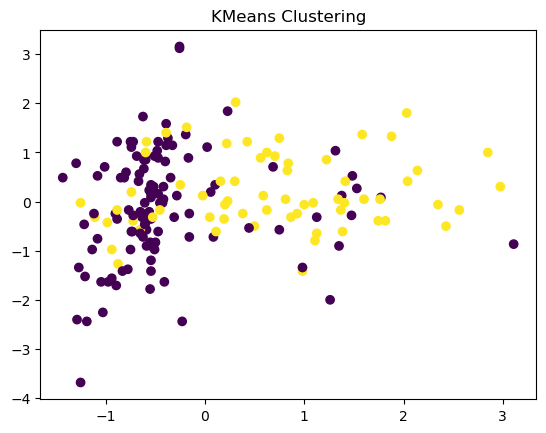

In [21]:
plot_clusters(X_scaled, kmeans_labels, title='KMeans Clustering')


In [25]:
ptimal_agg_clusters = find_optimal_agglomerative_clusters(X_scaled, max_clusters=20)
print(f"Optimal number of clusters for AgglomerativeClustering: {ptimal_agg_clusters}")
agglomerative = AgglomerativeClustering(n_clusters=ptimal_agg_clusters)
agg_labels = agglomerative.fit_predict(X_scaled)

Optimal number of clusters for AgglomerativeClustering: 2


Visualize AgglomerativeClustering clusters

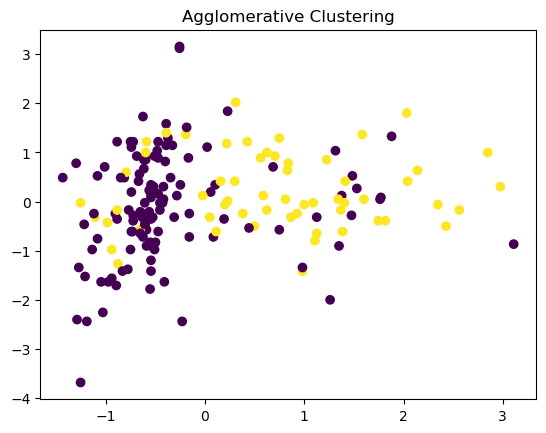

In [26]:
plot_clusters(X_scaled, agg_labels, title='Agglomerative Clustering')